In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()

In [2]:
from sklearn.datasets import load_iris

In [3]:
df=load_iris()
dataset=pd.DataFrame(df.data)
dataset.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
len(dataset)

150

In [5]:
dataset.describe()

,0,1,2,3
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       150 non-null    float64
 1   1       150 non-null    float64
 2   2       150 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [7]:
dataset.skew()

0    0.314911
1    0.318966
2   -0.274884
3   -0.102967
dtype: float64

In [8]:
dataset.columns=df.feature_names
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
df.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [10]:
dataset['species']=df.target

In [11]:
dataset.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
dataset['species'].nunique()

3

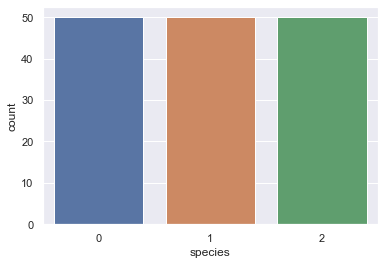

In [13]:
sns.countplot(dataset['species'])

In [14]:
np.zeros_like(15)

array(0)

In [15]:
dataset_setosa=dataset.loc[dataset['species']==0]
dataset_versicolor=dataset.loc[dataset['species']==1]
dataset_verginica=dataset.loc[dataset['species']==2]

Text(0.5, 0, 'Petal Length')

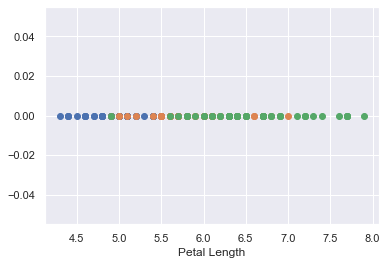

In [16]:
plt.plot(dataset_setosa['sepal length (cm)'],np.zeros_like(dataset_setosa['sepal length (cm)']),'o')
plt.plot(dataset_versicolor['sepal length (cm)'],np.zeros_like(dataset_versicolor['sepal length (cm)']),'o')
plt.plot(dataset_verginica['sepal length (cm)'],np.zeros_like(dataset_verginica['sepal length (cm)']),'o')
plt.xlabel('Petal Length')

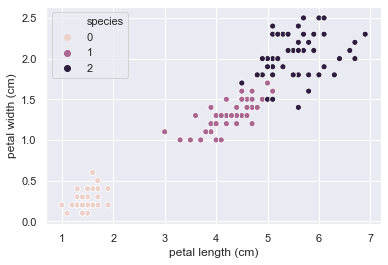

In [17]:
sns.scatterplot(dataset['petal length (cm)'],dataset['petal width (cm)'],hue=dataset['species'])

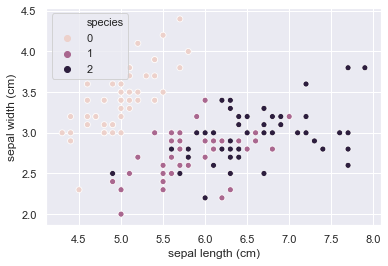

In [18]:
sns.scatterplot(dataset['sepal length (cm)'],dataset['sepal width (cm)'],hue=dataset['species'])

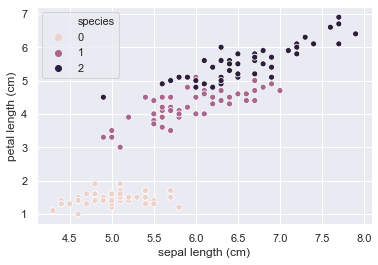

In [19]:
sns.scatterplot(dataset['sepal length (cm)'],dataset['petal length (cm)'],hue=dataset['species'])

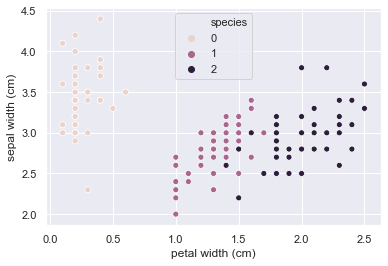

In [20]:
sns.scatterplot(dataset['petal width (cm)'],dataset['sepal width (cm)'],hue=dataset['species'])

In [21]:
x=dataset.drop('species',axis=1).values
y=dataset['species'].values

In [22]:
print(x.shape)
print(y.shape)

(150, 4)
(150,)


In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [24]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [25]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [26]:
x_train.shape

(120, 4)

In [27]:
y_test.shape

(30,)

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [29]:
model=Sequential()
model.add(Dense(100,input_dim=4,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test))

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 3ms/sample - loss: 1.0601 - accuracy: 0.6667 - val_loss: 1.0388 - val_accuracy: 0.6667
Epoch 2/100
120/120 [==============================] - 0s 117us/sample - loss: 1.0246 - accuracy: 0.6667 - val_loss: 1.0068 - val_accuracy: 0.6667
Epoch 3/100
120/120 [==============================] - 0s 109us/sample - loss: 0.9930 - accuracy: 0.6667 - val_loss: 0.9743 - val_accuracy: 0.6667
Epoch 4/100
120/120 [==============================] - 0s 96us/sample - loss: 0.9618 - accuracy: 0.6667 - val_loss: 0.9423 - val_accuracy: 0.6667
Epoch 5/100
120/120 [==============================] - 0s 92us/sample - loss: 0.9303 - accuracy: 0.6667 - val_loss: 0.9111 - val_accuracy: 0.6667
Epoch 6/100
120/120 [==============================] - 0s 98us/sample - loss: 0.8984 - accuracy: 0.6667 - val_loss: 0.8786 - val_accuracy: 0.6667
Epoch 7/100
120/120 [==============================] - 0s 100us/sample - loss:

Epoch 56/100
120/120 [==============================] - 0s 92us/sample - loss: 0.1378 - accuracy: 0.9667 - val_loss: 0.1610 - val_accuracy: 0.9667
Epoch 57/100
120/120 [==============================] - 0s 109us/sample - loss: 0.1327 - accuracy: 0.9667 - val_loss: 0.1506 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 109us/sample - loss: 0.1277 - accuracy: 0.9667 - val_loss: 0.1457 - val_accuracy: 0.9667
Epoch 59/100
120/120 [==============================] - 0s 100us/sample - loss: 0.1264 - accuracy: 0.9667 - val_loss: 0.1433 - val_accuracy: 0.9667
Epoch 60/100
120/120 [==============================] - 0s 100us/sample - loss: 0.1219 - accuracy: 0.9667 - val_loss: 0.1436 - val_accuracy: 0.9667
Epoch 61/100
120/120 [==============================] - 0s 100us/sample - loss: 0.1190 - accuracy: 0.9667 - val_loss: 0.1429 - val_accuracy: 0.9667
Epoch 62/100
120/120 [==============================] - 0s 100us/sample - loss: 0.1181 - accuracy: 0.9667 - val_l

In [30]:
losses=pd.DataFrame(model.history.history)

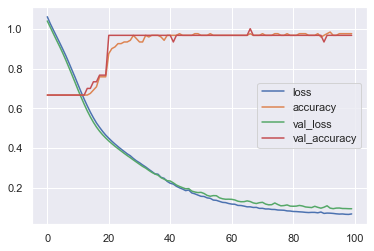

In [31]:
losses.plot()

In [32]:
from tensorflow.keras.layers import Dropout

In [33]:
model=Sequential()
model.add(Dense(100,input_dim=4,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))

In [34]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [35]:
model.fit(x_train,y_train,epochs=100,validation_data=(x_test,y_test),batch_size=20)

Train on 120 samples, validate on 30 samples
Epoch 1/100
120/120 [==============================] - 0s 4ms/sample - loss: 1.0866 - accuracy: 0.3417 - val_loss: 1.0557 - val_accuracy: 0.2333
Epoch 2/100
120/120 [==============================] - 0s 125us/sample - loss: 1.0373 - accuracy: 0.4417 - val_loss: 1.0117 - val_accuracy: 0.6000
Epoch 3/100
120/120 [==============================] - 0s 125us/sample - loss: 0.9957 - accuracy: 0.5000 - val_loss: 0.9729 - val_accuracy: 0.6667
Epoch 4/100
120/120 [==============================] - 0s 109us/sample - loss: 0.9639 - accuracy: 0.6167 - val_loss: 0.9328 - val_accuracy: 0.6667
Epoch 5/100
120/120 [==============================] - 0s 125us/sample - loss: 0.9085 - accuracy: 0.6583 - val_loss: 0.8921 - val_accuracy: 0.6667
Epoch 6/100
120/120 [==============================] - 0s 117us/sample - loss: 0.8827 - accuracy: 0.6500 - val_loss: 0.8493 - val_accuracy: 0.6667
Epoch 7/100
120/120 [==============================] - 0s 109us/sample - lo

120/120 [==============================] - 0s 109us/sample - loss: 0.1195 - accuracy: 0.9750 - val_loss: 0.1380 - val_accuracy: 0.9667
Epoch 57/100
120/120 [==============================] - 0s 117us/sample - loss: 0.1296 - accuracy: 0.9500 - val_loss: 0.1283 - val_accuracy: 0.9667
Epoch 58/100
120/120 [==============================] - 0s 109us/sample - loss: 0.1230 - accuracy: 0.9500 - val_loss: 0.1290 - val_accuracy: 0.9667
Epoch 59/100
120/120 [==============================] - 0s 104us/sample - loss: 0.1266 - accuracy: 0.9417 - val_loss: 0.1228 - val_accuracy: 0.9667
Epoch 60/100
120/120 [==============================] - 0s 100us/sample - loss: 0.0926 - accuracy: 0.9667 - val_loss: 0.1213 - val_accuracy: 0.9667
Epoch 61/100
120/120 [==============================] - 0s 100us/sample - loss: 0.1138 - accuracy: 0.9750 - val_loss: 0.1247 - val_accuracy: 0.9667
Epoch 62/100
120/120 [==============================] - 0s 115us/sample - loss: 0.1052 - accuracy: 0.9667 - val_loss: 0.1300 

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 100)               500       
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout (Dropout)            (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                 153       
Total params: 5,703
Trainable params: 5,703
Non-trainable params: 0
_________________________________________________________________


In [37]:
losses=pd.DataFrame(model.history.history)

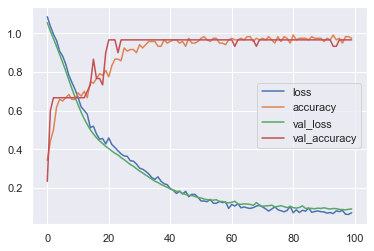

In [38]:
losses.plot()

In [39]:
predictions=model.predict_classes(x_test)

In [40]:
model.evaluate(x_test,y_test)

30/30 [==============================] - 0s 66us/sample - loss: 0.0903 - accuracy: 0.9667


[0.0902925506234169, 0.96666664]

In [41]:
model.evaluate(x_train,y_train)

120/120 [==============================] - 0s 50us/sample - loss: 0.0602 - accuracy: 0.9833


[0.06016278726359208, 0.98333335]

In [42]:
from sklearn.metrics import classification_report,confusion_matrix

In [43]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [44]:
print(confusion_matrix(y_test,predictions))

[[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
